In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Statistics/Datasets/shipping data - shipping data.csv")

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## **TASK 1**

image.png

In [ ]:
weight = df['Weight_in_gms']
n = len(weight)

# Calculate number of bins using Sturges' Rule
k = int(1 + 3.322 * np.log10(n))  # Number of classes
range_ = weight.max() - weight.min()
class_width = int(np.ceil(range_ / k))

# Define bins
bins = np.arange(weight.min(), weight.max() + class_width, class_width)

# Create grouped frequency distribution table
frequency_table = pd.cut(weight, bins=bins, right=False).value_counts().sort_index()

# Display the table
grouped_freq_table = pd.DataFrame({
    'Weight Interval': frequency_table.index.astype(str),
    'Frequency': frequency_table.values
})

print(grouped_freq_table)

   Weight Interval  Frequency
0     [1001, 1490)       1594
1     [1490, 1979)       1593
2     [1979, 2468)        482
3     [2468, 2957)        435
4     [2957, 3446)        411
5     [3446, 3935)        455
6     [3935, 4424)       1372
7     [4424, 4913)       1493
8     [4913, 5402)       1441
9     [5402, 5891)       1410
10    [5891, 6380)        307
11    [6380, 6869)          1
12    [6869, 7358)          0
13    [7358, 7847)          5


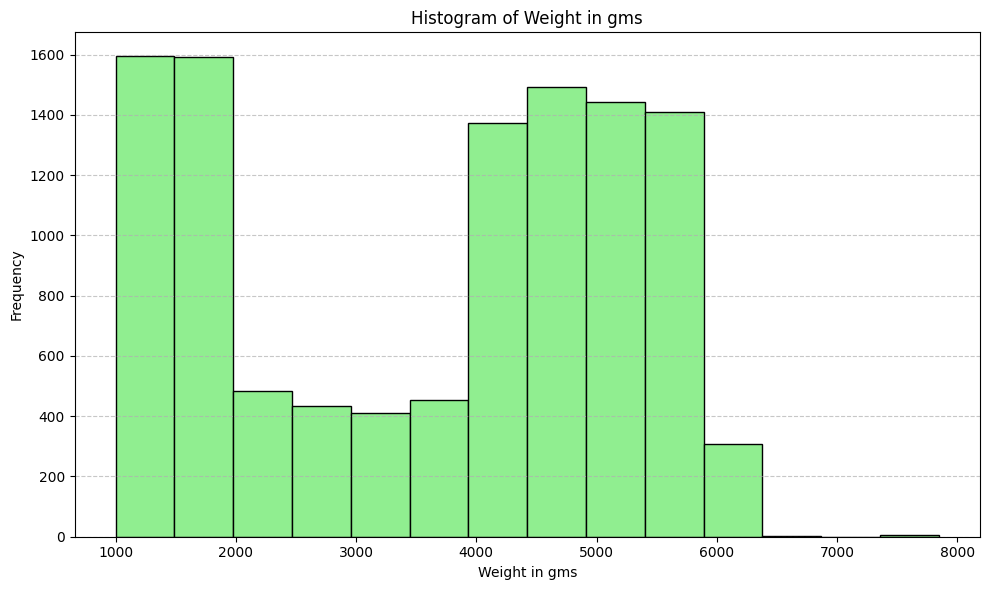

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Weight_in_gms'], bins=bins, edgecolor='black', color='lightgreen')
plt.xlabel("Weight in gms")
plt.ylabel("Frequency")
plt.title("Histogram of Weight in gms")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **TASK 2**

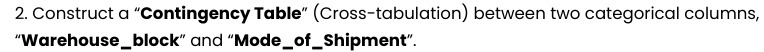

In [ ]:
# Generate the contingency table
contingency_table = pd.crosstab(df['Warehouse_block'], df['Mode_of_Shipment'])

# Convert to regular DataFrame for cleaner printing
contingency_table_df = contingency_table.reset_index()

# Print a clean, aligned table
print("Contingency Table: Warehouse_block vs Mode_of_Shipment")
print(contingency_table_df.to_string(index=False))

Contingency Table: Warehouse_block vs Mode_of_Shipment
Warehouse_block  Flight  Road  Ship
              A     297   294  1242
              B     296   294  1243
              C     295   294  1244
              D     297   292  1245
              F     592   586  2488


## **TASK 3**

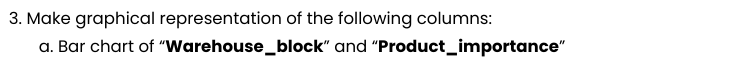

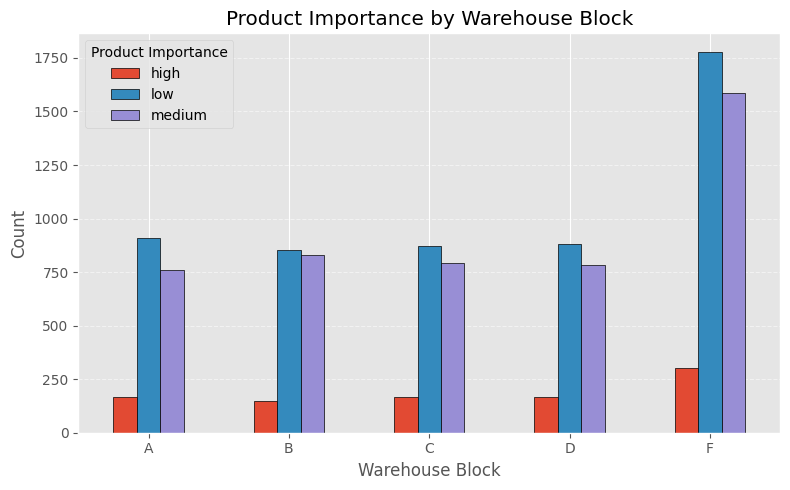

In [ ]:
# Create a cross-tab of counts
group_data = pd.crosstab(df['Warehouse_block'], df['Product_importance'])

# Plot grouped bar chart
group_data.plot(kind='bar', figsize=(8, 5), edgecolor='black')
plt.title("Product Importance by Warehouse Block")
plt.xlabel("Warehouse Block")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Product Importance")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



image.png

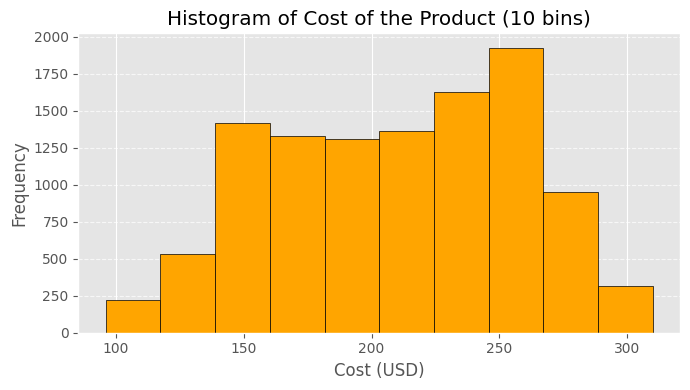

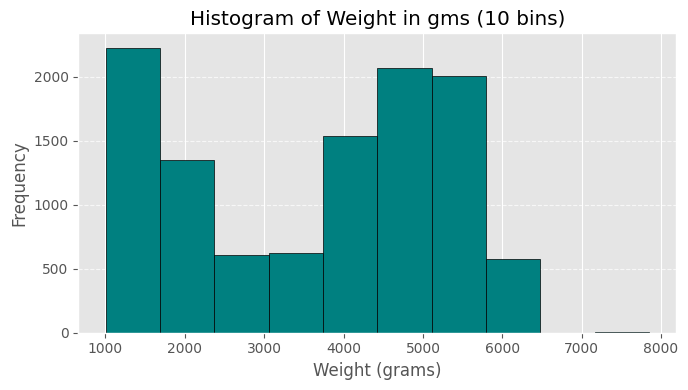

In [ ]:
# Histogram for Cost_of_the_Product with 10 bins
plt.figure(figsize=(7, 4))
plt.hist(df['Cost_of_the_Product'], bins=10, color='orange', edgecolor='black')
plt.title("Histogram of Cost of the Product (10 bins)")
plt.xlabel("Cost (USD)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histogram for Weight_in_gms with 10 bins
plt.figure(figsize=(7, 4))
plt.hist(df['Weight_in_gms'], bins=10, color='teal', edgecolor='black')
plt.title("Histogram of Weight in gms (10 bins)")
plt.xlabel("Weight (grams)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

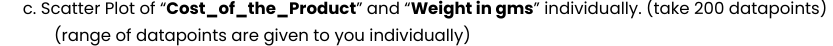

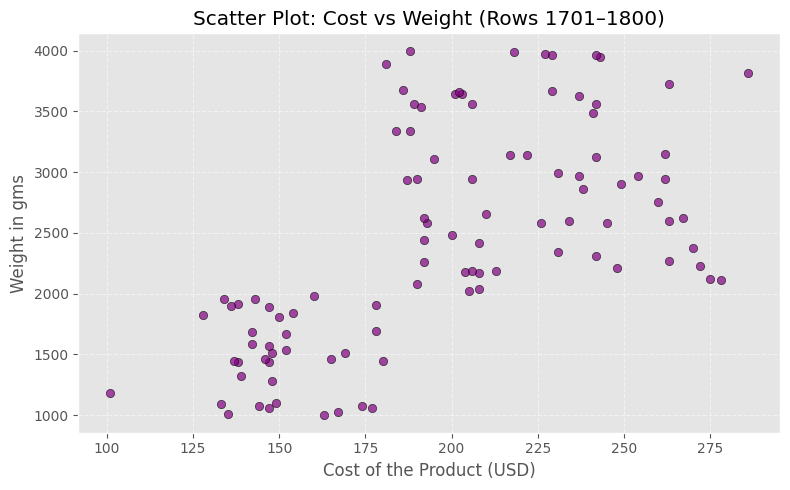

In [ ]:
#randomly taken 200 datapoints from 1700 to 1800
# Slice the dataset using the assigned range
subset = df.iloc[1700:1800]  # Note: iloc is 0-based, so 1700:1800 gets rows 1701 to 1800

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(subset['Cost_of_the_Product'], subset['Weight_in_gms'], color='purple', edgecolors='black', alpha=0.7)
plt.title("Scatter Plot: Cost vs Weight (Rows 1701–1800)")
plt.xlabel("Cost of the Product (USD)")
plt.ylabel("Weight in gms")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
